# Démo 9 : Bibliothèque scikit-learn

Cette démo est librement inspirée et traduite de http://scikit-learn.org/stable/tutorial/index.html

In [1]:
# vérifier que sklearn est bien installé en exécutant cette cellule
import sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Chargement de données

sklearn permet de charger directement un certain nombre d'ensembles de données, on vous demande ici de manipuler les fonctions qui permettent de les charger.

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

iris (150, 4) (150,)
digits (1797, 64) (1797,)
0


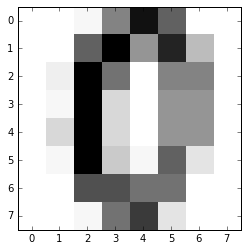

In [4]:
# Afficher les shapes des datasets
print 'iris', iris.data.shape, iris.target.shape
print 'digits', digits.data.shape, digits.target.shape

# Afficher un exemple de digits
i = 10
plt.imshow(digits.data[i,:].reshape(8, 8), interpolation="nearest", cmap='Greys')
print digits.target[i]

# Classification avec k-NN

## données iris

On va de nouveau utiliser le dataset iris, à vous de le séparer en train/test

In [5]:
np.random.seed(0)
indices = np.random.permutation(len(iris.target))

# Effectuer une séparation train/test comme d'habitude
iris_train_x = iris.data[indices[:100]]
iris_test_x = iris.data[indices[100:]]
iris_train_y = iris.target[indices[:100]]
iris_test_y = iris.target[indices[100:]]

print iris_train_x.shape, iris_train_y.shape

(100, 4) (100,)


On peut maintenant utiliser les fonctions de sklearn pour implémenter un plus proche voisin.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_train_x, iris_train_y)
knn.predict(iris_train_x)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 0])

Maintenant, faire varier le k des k-plus proches voisins, puis afficher la performance en fonction de k

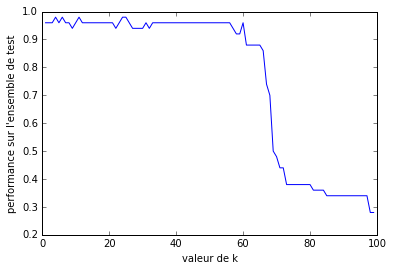

In [7]:
k_values = np.arange(1, 100)
k_perf = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(iris_train_x, iris_train_y)
    test_pred = knn.predict(iris_test_x)
    k_perf.append((test_pred == iris_test_y).mean())

plt.xlabel('valeur de k')
plt.ylabel('performance sur l\'ensemble de test')
plt.plot(k_values, k_perf)

## données digits

Maintenant on peut utiliser facilement le même classifieur pour un autre ensemble de données, les images de chiffres:

In [8]:
np.random.seed(0)
indices = np.random.permutation(len(digits.target))

# Effectuer une séparation train/test comme d'habitude
digits_train_x = digits.data[indices[:1500]]
digits_test_x = digits.data[indices[1500:]]
digits_train_y = digits.target[indices[:1500]]
digits_test_y = digits.target[indices[1500:]]

print digits_train_x.shape, digits_train_y.shape

(1500, 64) (1500,)


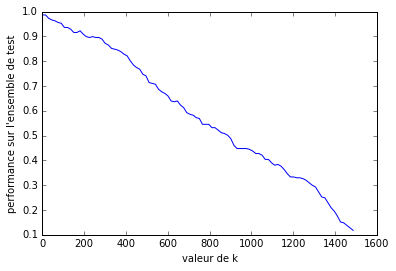

In [9]:
# on va faire varier k de 15 en 15
k_values = np.arange(1, 1500, 15)
k_perf = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(digits_train_x, digits_train_y)
    test_pred = knn.predict(digits_test_x)
    k_perf.append((test_pred == digits_test_y).mean())

plt.xlabel('valeur de k')
plt.ylabel('performance sur l\'ensemble de test')
plt.plot(k_values, k_perf)

# SVM

Corrigé de l'exercice sur les SVM, on regarde l'influence du paramètre C sur les régions de décision

In [10]:
# on va garder seulement 2 traits caractéristiques, et deux classes
iris_trainsvm_x = iris_train_x[np.logical_or(iris_train_y == 0, iris_train_y == 1), :2]
iris_trainsvm_y = iris_train_y[np.logical_or(iris_train_y == 0, iris_train_y == 1)]
iris_testsvm_x = iris_test_x[np.logical_or(iris_test_y == 0, iris_test_y == 1), :2]
iris_testsvm_y = iris_test_y[np.logical_or(iris_test_y == 0, iris_test_y == 1)]

In [11]:
# fonction helper qui prend un ensemble de données et retourne
# des coordonnées de points x, y pour une grille qui couvre
# les intervalles [x.min(), x.max()] et [y.min(), y.max()]

def get_plot_grid(data):
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    return xx, yy

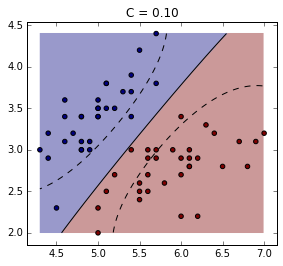

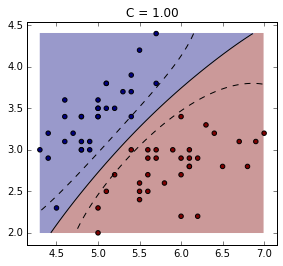

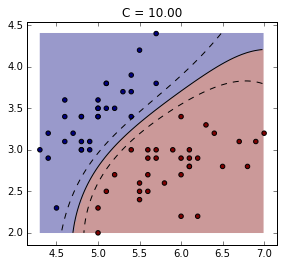

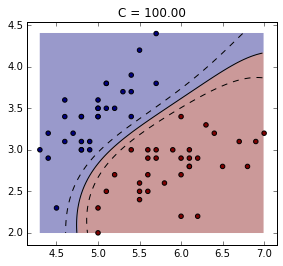

In [12]:
from sklearn.svm import SVC

for c in [.1, 1, 10, 100]:
    svc = SVC(kernel='rbf', C=c)
    svc.fit(iris_trainsvm_x, iris_trainsvm_y)

    # points où plotter la fonction de décision
    xx, yy = get_plot_grid(iris_trainsvm_x)

    # on obtient la valeur de la fonction de décision en ces points
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # On affiche ces points
    Z = Z.reshape(xx.shape)
    plt.imshow(Z > 0, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=.4, origin='lower')
    # On affiche les lignes de niveau [-.5, 0, .5] pour la fonction de décision
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
    # Finalement on affiche les points de l'ensemble d'entrainement
    plt.scatter(iris_trainsvm_x[:,0], iris_trainsvm_x[:,1], c=iris_trainsvm_y)
    plt.title('C = %.2f' % (c, ))
    
    plt.show()

# Affichage des régions de décision en 2d

En utilisant sklearn, il est facile d'afficher les régions de décision pour plusieurs classifieurs différents, pour mieux comprendre comment ils séparent les données.

Vous aurez surement besoin de cette fonction helper, regardez ses paramètres puis essayez la sur knn.

In [13]:
def plot_regions(predictor, data_x, data_y, title=''):
    """
    predictor: classifieur entrainé, doit avoir une méthode predict
    data_x: matrice n x d, n le nombre d'exemples et d les traits caractéristiques
    data_y: vecteur des cibles, dimension (d, )
    title: titre du plot
    """
    xx, yy = get_plot_grid(data_x)
    
    Z = predictor.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=0.4, origin='lower', interpolation='none')
    plt.scatter(data_x[:,0], data_x[:,1], c=data_y, marker='x')
    plt.title(title)
    
    plt.show()

In [14]:
# On garde juste les deux premiers traits caractéristiques
iris_train2_x = iris_train_x[:,:2]
iris_test2_y = iris_test_x[:,:2]

print iris_train2_x.shape, iris_test2_y.shape

(100, 2) (50, 2)


Afficher les régions de décision pour les classifieurs vus en cours

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

classifiers = [
    ('bayes naif noyau gaussien', GaussianNB()),
    ('k-ppv', KNeighborsClassifier()),
    ('decision tree', DecisionTreeClassifier()),
    ('random forests', RandomForestClassifier()),
    ('svm rbf', SVC()),
    ('svm linear', SVC(kernel='linear')),
    ('bagging de knn', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5))
]

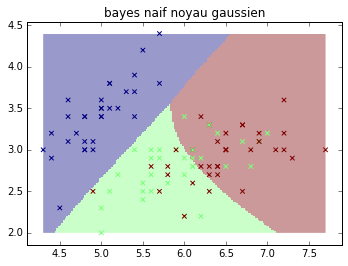

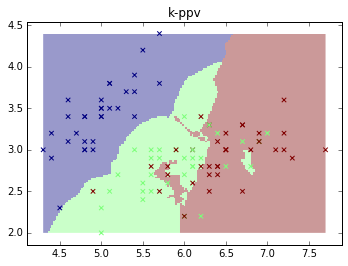

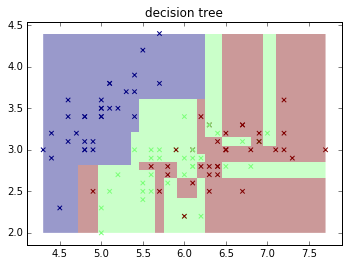

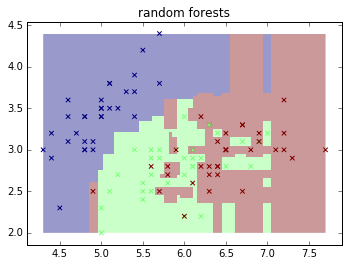

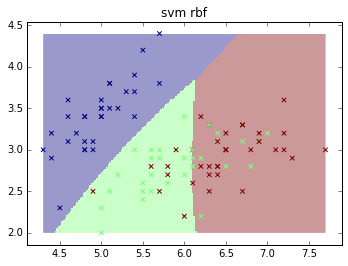

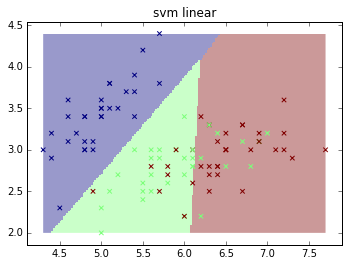

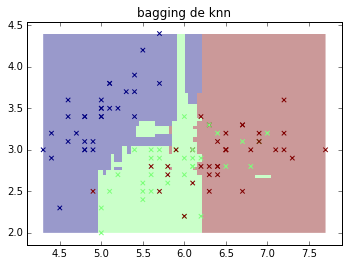

In [16]:
for model_name, model_instance in classifiers:
    classifier = model_instance
    classifier.fit(iris_train2_x, iris_train_y)

    plot_regions(classifier, iris_train2_x, iris_train_y, title=model_name)